In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\Dell.com\Desktop\Dataset - complex_account_billing_data.csv')

# Clean the data
data['Billing Date'] = pd.to_datetime(data['Billing Date'])
data['Amount'] = data['Amount'].astype(float)
data.fillna(method='ffill', inplace=True)

# Display the first few rows of the dataset
data.head()


C:\Users\Dell.com\AppData\Local\Temp\ipykernel_19748\3169624431.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,Paid,Therapy,ENT


In [19]:
# Data Validation
duplicates = data.duplicated().sum()
invalid_amounts = data[data['Amount'] < 0]
invalid_statuses = data[~data['Status'].isin(['Paid', 'Unpaid', 'Pending', 'Unknown'])]

# Billing Analysis
billing_cycle = (data['Billing Date'].max() - data['Billing Date'].min()).days
discrepancies = data[data['Amount'] > 10000]  # Example threshold
average_payment = data['Amount'].mean()
late_payments = data[data['Status'] == 'Late']

# Generate a summary of the analysis
summary = {
    'Total Records': len(data),
    'Duplicate Records': duplicates,
    'Invalid Amount Entries': len(invalid_amounts),
    'Invalid Status Entries': len(invalid_statuses),
    'Billing Cycle (days)': billing_cycle,
    'Average Payment': average_payment,
    'Discrepancies': len(discrepancies),
    'Late Payments': len(late_payments)
}

print(summary)


{'Total Records': 110, 'Duplicate Records': 0, 'Invalid Amount Entries': 0, 'Invalid Status Entries': 0, 'Billing Cycle (days)': 99, 'Average Payment': 479.3090181019999, 'Discrepancies': 0, 'Late Payments': 0}


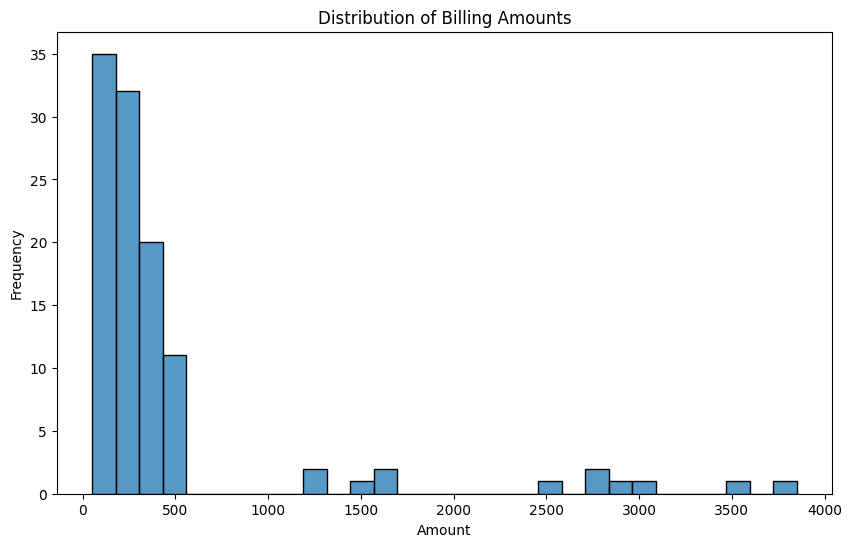

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot billing data
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=30)
plt.title('Distribution of Billing Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


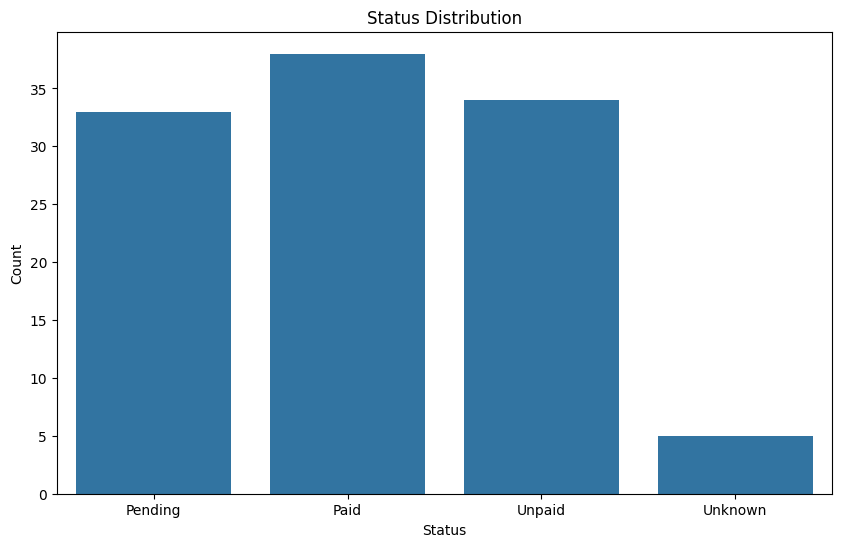

In [21]:
# Late Payments Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Status')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

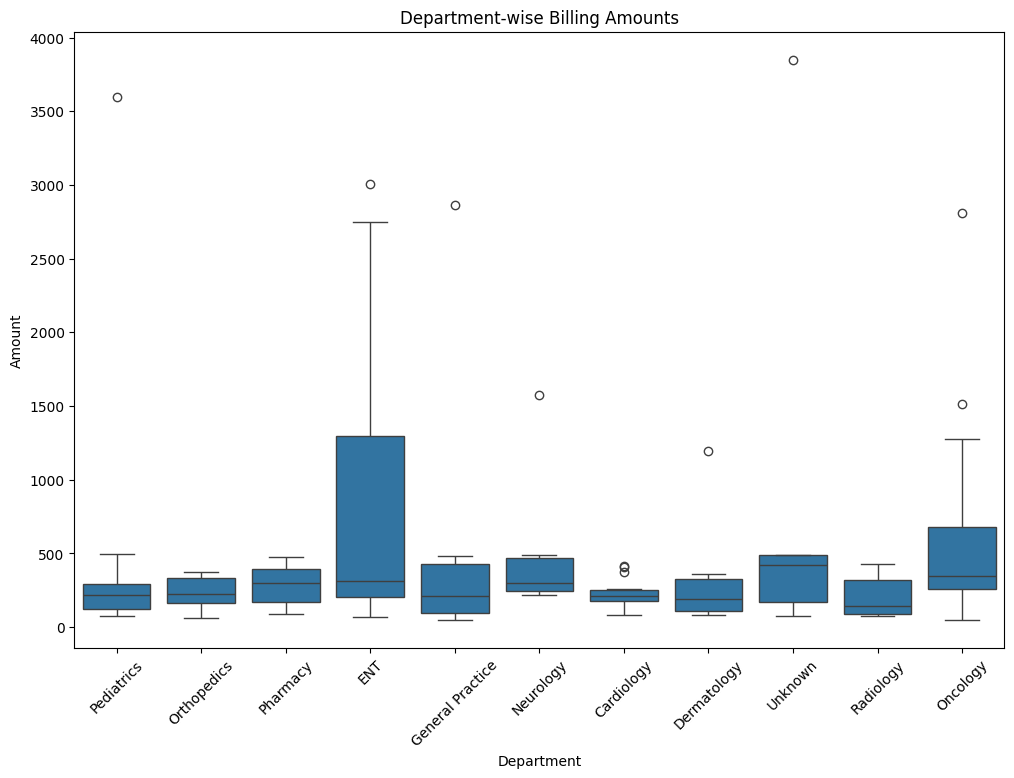

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Department', y='Amount')
plt.title('Department-wise Billing Amounts')
plt.xlabel('Department')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [23]:
from transformers import pipeline
# Save the summary to a text file
with open('billing_summary.txt', 'w') as file:
    for key, value in summary.items():
        file.write(f'{key}: {value}\n')

# Save the cleaned and analyzed data to a new CSV file
data.to_csv('cleaned_billing_data.csv', index=False)

# Use a transformer-based model to generate the report
generator = pipeline('text-generation', model='gpt2')

def generate_report_using_transformer(summary):
    prompt = f"""
    Generate a detailed billing analysis report based on the following summary:

    Total Records: {summary['Total Records']}
    Duplicate Records: {summary['Duplicate Records']}
    Invalid Amount Entries: {summary['Invalid Amount Entries']}
    Invalid Status Entries: {summary['Invalid Status Entries']}
    Billing Cycle (days): {summary['Billing Cycle (days)']}
    Average Payment: ${summary['Average Payment']:.2f}
    Discrepancies: {summary['Discrepancies']}
    Late Payments: {summary['Late Payments']}
    """
    
    result = generator(prompt, max_length=500, num_return_sequences=1)
    return result[0]['generated_text']

# Generate the report using the transformer model
report_text = generate_report_using_transformer(summary)

# Save the report to a text file
with open('billing_report.txt', 'w') as file:
    file.write(report_text)

print("Report generated and saved as 'billing_report.txt'.")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Report generated and saved as 'billing_report.txt'.
